In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#gas setting
T=1000 #K
P=1.0 #bar (total pressure)
VMR=0.95 #H2O volume mixing ratio
kB=1.380649e-16
nair=(P*1.e6)/(kB*T) #gas number density (cgs)
L=50 #cm
nH2O=VMR*nair #CO number density (cgs)

In [3]:
#cross section
from exojax.spec import AutoXS
from exojax.spec.rtransfer import nugrid

nus,wav,res=nugrid(15400,15600,2000,unit="AA")
autoxs=AutoXS(nus,"ExoMol","H2O") #using ExoMol CO (12C-16O). HITRAN and HITEMP are also supported.  
xsv=autoxs.xsection(T,P) #cross section for 1000K, 1bar (cm2)

xsmode assumes ESLOG: mode= lpf
Recommendated database by ExoMol:  POKAZATEL
H2O/1H2-16O/POKAZATEL
broadf= True
Background atmosphere:  H2
Error: Couldn't download .broad file and save.
Note: Couldn't find the hdf5 format. We convert data to the hdf5 format. After the second time, it will become much faster.
Reading transition file
Note: Couldn't find the hdf5 format. We convert data to the hdf5 format. After the second time, it will become much faster.
.broad is used.
Broadening code level= a1
default broadening parameters are used for  12  J lower states in  63  states
# of lines= 28499233
MODIT selected
the wavenumber grid is interpolated.
Note: All of the line center should be within wavenumber grid for MODIT/DIT.


In [4]:
#absorption 
import jax.numpy as jnp
def absmodel(n,L,sigma):
    """
    Args:
        n: number density (cm-3)
        L: path length (cm)
        sigma: cross section (cm2)
        
    """
    return jnp.exp(-n*L*sigma)

In [6]:
#hello a spectrum
spec=absmodel(nH2O,L,xsv)

# of lines= 28499233
MODIT selected
the wavenumber grid is interpolated.
Note: All of the line center should be within wavenumber grid for MODIT/DIT.
# of lines= 28499233
MODIT selected
the wavenumber grid is interpolated.
Note: All of the line center should be within wavenumber grid for MODIT/DIT.
# of lines= 28499233
MODIT selected
the wavenumber grid is interpolated.
Note: All of the line center should be within wavenumber grid for MODIT/DIT.
# of lines= 28499233
MODIT selected
the wavenumber grid is interpolated.
Note: All of the line center should be within wavenumber grid for MODIT/DIT.


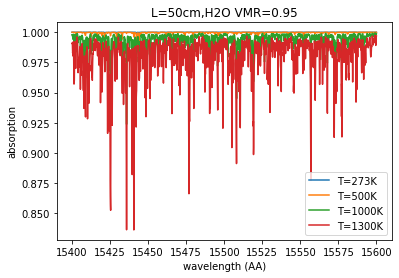

In [9]:
for TK in [273, 500, 1000, 1300]:
    xsv=autoxs.xsection(TK,P) #cross section for T, 1bar (cm2)
    spec=absmodel(nH2O,L,xsv)
    plt.plot(wav[::-1],spec,label="T="+str(TK)+"K")
plt.xlabel("wavelength (AA)")
plt.ylabel("absorption")
plt.title("L="+str(L)+"cm"+",H2O VMR="+str(VMR))
plt.legend()
plt.savefig("H2Om.png")